#### y값이 2인 행들을 1로 바꾸기

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = './train_data_T01_cleaned.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to understand its structure
df.head()

FileNotFoundError: [Errno 2] No such file or directory: './train_data_T01_cleaned.csv'

In [2]:
# Update the 'Y_Class' column where the value is 2, set it to 1
df.loc[df['Y_Class'] == 2, 'Y_Class'] = 1

# Display the first few rows to verify the change
df.head()

,Y_Class,Y_Quality,X_246,X_247,X_248,X_250,X_251,X_253,X_254,X_256,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,0,0.519519,1,89,0,11,11,11,42,465.0,...,203.1,208.5,201.160714,193.0,207.1,195.682143,184.9,466,448.634615,432
1,1,0.545925,2,93,170,11,0,12,51,502.5,...,183.0,194.0,187.058621,175.7,179.4,170.306897,154.2,446,430.603774,413
2,0,0.517938,1,91,1,12,0,12,51,443.7,...,175.8,192.7,178.296429,167.4,185.0,179.503571,172.6,466,447.769231,422
3,1,0.526997,1,91,1,12,0,12,51,442.3,...,172.1,195.4,184.742857,169.7,178.3,168.703571,164.3,456,439.538461,423
4,1,0.558770,1,89,0,11,89,11,42,496.5,...,206.1,201.3,188.282143,177.4,171.8,163.285714,150.3,466,449.403846,432


# Training

In [3]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = df.drop(['Y_Class', 'Y_Quality'], axis=1)
y = df['Y_Class']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((82, 726), (21, 726), (82,), (21,))

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize models
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)

# Dictionary to store the performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# List of models
models = [('Logistic Regression', logistic_model),
          ('Decision Tree', decision_tree_model),
          ('Random Forest', random_forest_model)]

# Train and evaluate each model
for model_name, model in models:
    # Train the model
    model.fit(X_train, y_train)
    
    # Predictions on test set
    y_pred = model.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the metrics
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

# Convert metrics to a DataFrame for display
performance_df = pd.DataFrame(performance_metrics)

performance_df

C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.761905,0.647619,0.761905,0.700129
1,Decision Tree,0.857143,0.846561,0.857143,0.848980
2,Random Forest,0.809524,0.655329,0.809524,0.724311


# Test

## 한 번에

In [12]:
def evaluate_models_on_test_data(df_test, trained_models, X_train_columns):
    # Separate features and target variable from the test data
    X_test_new = df_test.drop(['Y_Class', 'Y_Quality', 'LINE'], axis=1)  # Excluding 'LINE' column
    y_test_new = df_test['Y_Class']
    
    # Fill NaN values with the mean of each column
    X_test_new_filled = X_test_new.fillna(X_test_new.mean())
    
    # Remove columns that still have NaN values after filling
    X_test_new_cleaned = X_test_new_filled.dropna(axis=1)
    
    # Make sure to use only the columns that the model was trained on
    X_test_new_cleaned_filtered = X_test_new_cleaned[X_train_columns]
    
    # Dictionary to store the performance metrics for the cleaned test data
    cleaned_test_performance_metrics = {
        'Model': [],
        'Cleaned Test Accuracy': [],
        'Cleaned Test Precision': [],
        'Cleaned Test Recall': [],
        'Cleaned Test F1 Score': []
    }

    # Evaluate each trained model on the cleaned test set
    for model_name, model in trained_models:
        # Predictions on cleaned test set
        y_pred_cleaned_test = model.predict(X_test_new_cleaned_filtered)
        
        # Evaluate the model
        cleaned_test_accuracy = accuracy_score(y_test_new, y_pred_cleaned_test)
        cleaned_test_precision = precision_score(y_test_new, y_pred_cleaned_test, average='weighted')
        cleaned_test_recall = recall_score(y_test_new, y_pred_cleaned_test, average='weighted')
        cleaned_test_f1 = f1_score(y_test_new, y_pred_cleaned_test, average='weighted')
        
        # Store the metrics
        cleaned_test_performance_metrics['Model'].append(model_name)
        cleaned_test_performance_metrics['Cleaned Test Accuracy'].append(cleaned_test_accuracy)
        cleaned_test_performance_metrics['Cleaned Test Precision'].append(cleaned_test_precision)
        cleaned_test_performance_metrics['Cleaned Test Recall'].append(cleaned_test_recall)
        cleaned_test_performance_metrics['Cleaned Test F1 Score'].append(cleaned_test_f1)

    # Convert metrics to a DataFrame for display
    cleaned_test_performance_df = pd.DataFrame(cleaned_test_performance_metrics)
    
    return cleaned_test_performance_df

# Evaluate the trained models on the new test data
file_path = './test_data_T01.csv'
df = pd.read_csv(file_path)
df.loc[df['Y_Class'] == 2, 'Y_Class'] = 1
evaluate_models_on_test_data(df, models, X_train.columns)

C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Model,Cleaned Test Accuracy,Cleaned Test Precision,Cleaned Test Recall,Cleaned Test F1 Score
0,Logistic Regression,0.846154,0.715976,0.846154,0.775641
1,Decision Tree,0.807692,0.827106,0.807692,0.816140
2,Random Forest,0.846154,0.715976,0.846154,0.775641
3,KNN,0.846154,0.715976,0.846154,0.775641


## 클래스별로

In [13]:
from sklearn.metrics import classification_report

def evaluate_models_on_test_data_by_class(df_test, trained_models, X_train_columns):
    # Separate features and target variable from the test data
    X_test_new = df_test.drop(['Y_Class', 'Y_Quality', 'LINE'], axis=1)  # Excluding 'LINE' column
    y_test_new = df_test['Y_Class']
    
    # Fill NaN values with the mean of each column
    X_test_new_filled = X_test_new.fillna(X_test_new.mean())
    
    # Remove columns that still have NaN values after filling
    X_test_new_cleaned = X_test_new_filled.dropna(axis=1)
    
    # Make sure to use only the columns that the model was trained on
    X_test_new_cleaned_filtered = X_test_new_cleaned[X_train_columns]
    
    # Dictionary to store the classification reports
    class_reports = {}
    
    # Evaluate each trained model on the cleaned test set
    for model_name, model in trained_models:
        # Predictions on cleaned test set
        y_pred_cleaned_test = model.predict(X_test_new_cleaned_filtered)
        
        # Generate classification report
        class_report = classification_report(y_test_new, y_pred_cleaned_test, output_dict=True)
        
        # Store the report
        class_reports[model_name] = class_report

    return class_reports

# Evaluate the trained models on the new test data, class-wise
file_path = './test_data_T01.csv'
df = pd.read_csv(file_path)
df.loc[df['Y_Class'] == 2, 'Y_Class'] = 1
class_reports = evaluate_models_on_test_data_by_class(df, models, X_train.columns)

# Convert the class_reports to a more readable format
class_reports_readable = {}
for model, report in class_reports.items():
    class_reports_readable[model] = pd.DataFrame(report).transpose()

class_reports_readable['Logistic Regression'], class_reports_readable['Decision Tree'], class_reports_readable['Random Forest']

C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

(              precision    recall  f1-score    support
 0              0.000000  0.000000  0.000000   4.000000
 1              0.846154  1.000000  0.916667  22.000000
 accuracy       0.846154  0.846154  0.846154   0.846154
 macro avg      0.423077  0.500000  0.458333  26.000000
 weighted avg   0.715976  0.846154  0.775641  26.000000,
               precision    recall  f1-score    support
 0              0.400000  0.500000  0.444444   4.000000
 1              0.904762  0.863636  0.883721  22.000000
 accuracy       0.807692  0.807692  0.807692   0.807692
 macro avg      0.652381  0.681818  0.664083  26.000000
 weighted avg   0.827106  0.807692  0.816140  26.000000,
               precision    recall  f1-score    support
 0              0.000000  0.000000  0.000000   4.000000
 1              0.846154  1.000000  0.916667  22.000000
 accuracy       0.846154  0.846154  0.846154   0.846154
 macro avg      0.423077  0.500000  0.458333  26.000000
 weighted avg   0.715976  0.846154  0.775641  

# [추가] KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

# Train the KNN model on the training data
knn_model.fit(X_train, y_train)

# Add the KNN model to the list of models for later evaluation
models.append(('KNN', knn_model))

# Predictions on training set to evaluate performance
y_pred_train_knn = knn_model.predict(X_train)

# Evaluate the model on training data
accuracy_train_knn = accuracy_score(y_train, y_pred_train_knn)
precision_train_knn = precision_score(y_train, y_pred_train_knn, average='weighted')
recall_train_knn = recall_score(y_train, y_pred_train_knn, average='weighted')
f1_train_knn = f1_score(y_train, y_pred_train_knn, average='weighted')

accuracy_train_knn, precision_train_knn, recall_train_knn, f1_train_knn

C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8658536585365854, 0.7497025580011898, 0.8658536585365854, 0.803602741909772)

In [14]:
# Evaluate the trained KNN model on the new test data, class-wise
file_path = './test_data_T01.csv'
df = pd.read_csv(file_path)
df.loc[df['Y_Class'] == 2, 'Y_Class'] = 1
knn_class_reports = evaluate_models_on_test_data_by_class(df, [('KNN', knn_model)], X_train.columns)

# Convert the class_reports to a more readable format
knn_class_reports_readable = {}
for model, report in knn_class_reports.items():
    knn_class_reports_readable[model] = pd.DataFrame(report).transpose()

knn_class_reports_readable['KNN']

C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jjhbe\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

,precision,recall,f1-score,support
0,0.000000,0.000000,0.000000,4.000000
1,0.846154,1.000000,0.916667,22.000000
accuracy,0.846154,0.846154,0.846154,0.846154
macro avg,0.423077,0.500000,0.458333,26.000000
weighted avg,0.715976,0.846154,0.775641,26.000000


# [추가] data_A_T01.csv를 가지고 분석

## 2를 1로 바꾸기

In [14]:
# Importing necessary libraries
import pandas as pd

# Load the CSV file into a DataFrame
file_path = './data_A_T01.csv'
df = pd.read_csv(file_path)

# Replace all occurrences of 2 in the 'Y_Class' column with 1
df['Y_Class'].replace(2, 1, inplace=True)

# Show the first few rows of the DataFrame to confirm the change
df.head()

,Y_Class,Y_Quality,LINE,X_128,X_129,X_130,X_131,X_132,X_133,X_134,...,X_2861,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870
0,1,0.540002,T010306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,175.225000,159.9,446.0,430.442308,413.0,NaN,NaN,NaN,NaN,NaN
1,0,0.521249,T010305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,174.727586,160.5,446.0,429.716981,413.0,NaN,NaN,NaN,NaN,NaN
2,1,0.536206,T010306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,188.696552,181.7,446.0,429.245283,413.0,NaN,NaN,NaN,NaN,NaN
3,1,0.548592,T010306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.775862,154.1,446.0,429.981132,415.0,NaN,NaN,NaN,NaN,NaN
4,1,0.526656,T010305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,168.258621,158.3,446.0,429.301887,413.0,NaN,NaN,NaN,NaN,NaN


## null이 반 이상인 컬럼을 지우기

In [15]:
# Drop columns where more than 50% of the values are null
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

# Show the first few rows of the DataFrame to confirm the change
df.head()

,Y_Class,Y_Quality,LINE,X_246,X_247,X_248,X_250,X_251,X_253,X_254,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,1,0.540002,T010306,1.0,87.0,144.0,12.0,0.0,12.0,51.0,...,177.1,186.2,169.907143,156.5,188.4,175.225000,159.9,446.0,430.442308,413.0
1,0,0.521249,T010305,1.0,89.0,0.0,11.0,90.0,11.0,42.0,...,170.5,186.8,182.758621,175.7,182.0,174.727586,160.5,446.0,429.716981,413.0
2,1,0.536206,T010306,4.0,93.0,150.0,12.0,0.0,12.0,51.0,...,170.8,207.8,191.775862,166.0,195.1,188.696552,181.7,446.0,429.245283,413.0
3,1,0.548592,T010306,1.0,89.0,152.0,12.0,0.0,12.0,51.0,...,174.5,190.7,181.686207,172.7,180.0,168.775862,154.1,446.0,429.981132,415.0
4,1,0.526656,T010305,1.0,95.0,0.0,11.0,98.0,11.0,42.0,...,173.2,195.0,184.365517,171.4,175.7,168.258621,158.3,446.0,429.301887,413.0


## 컬럼의 unique값이 하나인 컬럼을 지우기

In [16]:
# Drop columns with only one unique value
df = df.loc[:, df.nunique() > 1]

# Show the first few rows of the DataFrame to confirm the change
df.head()

,Y_Class,Y_Quality,LINE,X_246,X_247,X_248,X_250,X_251,X_253,X_254,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,1,0.540002,T010306,1.0,87.0,144.0,12.0,0.0,12.0,51.0,...,177.1,186.2,169.907143,156.5,188.4,175.225000,159.9,446.0,430.442308,413.0
1,0,0.521249,T010305,1.0,89.0,0.0,11.0,90.0,11.0,42.0,...,170.5,186.8,182.758621,175.7,182.0,174.727586,160.5,446.0,429.716981,413.0
2,1,0.536206,T010306,4.0,93.0,150.0,12.0,0.0,12.0,51.0,...,170.8,207.8,191.775862,166.0,195.1,188.696552,181.7,446.0,429.245283,413.0
3,1,0.548592,T010306,1.0,89.0,152.0,12.0,0.0,12.0,51.0,...,174.5,190.7,181.686207,172.7,180.0,168.775862,154.1,446.0,429.981132,415.0
4,1,0.526656,T010305,1.0,95.0,0.0,11.0,98.0,11.0,42.0,...,173.2,195.0,184.365517,171.4,175.7,168.258621,158.3,446.0,429.301887,413.0


## 값이 NaN이거나 무한대인 컬럼 지우기

In [17]:
import numpy as np

# Drop columns containing NaN or infinite values
df = df.replace([np.inf, -np.inf], np.nan)
df.dropna(axis=1, how='any', inplace=True)

# Show the first few rows of the DataFrame to confirm the change
df.head()

,Y_Class,Y_Quality,LINE,X_246,X_247,X_248,X_250,X_251,X_253,X_254,...,X_2856,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865
0,1,0.540002,T010306,1.0,87.0,144.0,12.0,0.0,12.0,51.0,...,177.1,186.2,169.907143,156.5,188.4,175.225000,159.9,446.0,430.442308,413.0
1,0,0.521249,T010305,1.0,89.0,0.0,11.0,90.0,11.0,42.0,...,170.5,186.8,182.758621,175.7,182.0,174.727586,160.5,446.0,429.716981,413.0
2,1,0.536206,T010306,4.0,93.0,150.0,12.0,0.0,12.0,51.0,...,170.8,207.8,191.775862,166.0,195.1,188.696552,181.7,446.0,429.245283,413.0
3,1,0.548592,T010306,1.0,89.0,152.0,12.0,0.0,12.0,51.0,...,174.5,190.7,181.686207,172.7,180.0,168.775862,154.1,446.0,429.981132,415.0
4,1,0.526656,T010305,1.0,95.0,0.0,11.0,98.0,11.0,42.0,...,173.2,195.0,184.365517,171.4,175.7,168.258621,158.3,446.0,429.301887,413.0


## Standardization

In [18]:
from sklearn.preprocessing import StandardScaler

# Store the 'Y_Class' and 'Y_Quality' columns temporarily
y_class = df['Y_Class']

# Drop 'Y_Class' and 'Y_Quality' columns from the DataFrame
df.drop(['Y_Class', 'Y_Quality'], axis=1, inplace=True)

# Identify numerical columns after dropping 'Y_Class' and 'Y_Quality'
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Apply standardization only on numerical columns
df[num_cols] = scaler.fit_transform(df[num_cols])

# Concatenate Y_Class and Y_Quality back into the DataFrame
df = pd.concat([df, y_class], axis=1)

# Optionally, to de-fragment the DataFrame
df = df.copy()

# Show the DataFrame
df.head()

,LINE,X_246,X_247,X_248,X_250,X_251,X_253,X_254,X_256,X_257,...,X_2857,X_2858,X_2859,X_2860,X_2861,X_2862,X_2863,X_2864,X_2865,Y_Class
0,T010306,-0.383751,-1.444519,1.627125,1.343260,-0.736647,0.862116,0.918073,1.172655,1.215634,...,-0.947393,-1.614798,-1.613758,0.587225,0.286139,-0.107506,-1.780047,-1.530483,-1.244903,1
1,T010305,-0.383751,-0.716617,-0.816720,-0.744457,1.012325,-1.159937,-1.089239,-0.107828,-0.141720,...,-0.902251,-0.482382,0.021791,-0.057559,0.234620,-0.053298,-1.780047,-1.630148,-1.244903,0
2,T010306,2.647096,0.739187,1.728952,1.343260,-0.736647,0.862116,0.918073,1.036156,1.112620,...,0.677709,0.312177,-0.804502,1.262234,1.681451,1.862054,-1.780047,-1.694963,-1.244903,1
3,T010306,-0.383751,-0.716617,1.762894,1.343260,-0.736647,0.862116,0.918073,0.971157,1.009607,...,-0.608830,-0.576879,-0.233763,-0.259054,-0.381828,-0.631517,-1.780047,-1.593852,-0.977026,1
4,T010305,-0.383751,1.467090,-0.816720,-0.744457,1.167789,-1.159937,-1.089239,-0.088328,-0.050826,...,-0.285314,-0.340790,-0.344503,-0.692268,-0.435401,-0.252061,-1.780047,-1.687185,-1.244903,1


## class stratify해서 train data와 test data로 split하기

In [19]:
from sklearn.model_selection import train_test_split

# Extract the features and the target variable
X = df.drop('Y_Class', axis=1)
y = df['Y_Class']

# Stratified splitting of the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Show the size of the training and testing data
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103, 721), (26, 721), (103,), (26,))

## (LINE 칼럼을 지우고) training하고 test data에 대한 성능 확인하기

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import train_test_split

# Load data and perform pre-processing steps (assuming df is the DataFrame)

# Drop the 'LINE' column if it exists
if 'LINE' in df.columns:
    df.drop('LINE', axis=1, inplace=True)

# Extract the features and the target variable
X = df.drop('Y_Class', axis=1)
y = df['Y_Class']

# Convert the target variable to integer type
y = y.astype(int)

# Stratified splitting of the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the models
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()

# Dictionary to store the models and their names
models = {
    'Logistic Regression': logistic_model,
    'Decision Tree': decision_tree_model,
    'Random Forest': random_forest_model,
    'K-Nearest Neighbors': knn_model
}

# Dictionary to store the performance metrics
performance_metrics = {
    'Model': [],
    'Accuracy': [],
    'AUC': [],
    'Weighted F1 Score': []
}

# Train each model and evaluate their performance
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    weighted_f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Store the performance metrics
    performance_metrics['Model'].append(model_name)
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['AUC'].append(auc)
    performance_metrics['Weighted F1 Score'].append(weighted_f1)

# Convert the performance metrics into a DataFrame for easy viewing
performance_df = pd.DataFrame(performance_metrics)

performance_df

,Model,Accuracy,AUC,Weighted F1 Score
0,Logistic Regression,0.846154,0.602273,0.823857
1,Decision Tree,0.846154,0.704545,0.846154
2,Random Forest,0.846154,0.500000,0.775641
3,K-Nearest Neighbors,0.846154,0.500000,0.775641


## [추가] class별로 성능을 보여주기

In [21]:
# Convert the nested dictionary of class-wise metrics into a DataFrame for better visualization
class_wise_df_list = []

for model_name, metrics in class_wise_metrics.items():
    for class_label, class_metrics in metrics.items():
        if class_label in ['Class 0', 'Class 1']:  # Only consider the individual classes
            class_metrics['Model'] = model_name
            class_metrics['Class'] = class_label
            class_wise_df_list.append(class_metrics)

# Create a DataFrame from the list of dictionaries
class_wise_df = pd.DataFrame(class_wise_df_list)

# Reorder the columns for better readability
class_wise_df = class_wise_df[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

class_wise_df

NameError: name 'class_wise_metrics' is not defined

## [추가] decision tree에 대해 pruning해서 성능 확인하기

In [23]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the pruned Decision Tree model with reduced max_depth
pruned_decision_tree_model = DecisionTreeClassifier(max_depth=2, random_state=42)

# Train the pruned Decision Tree model
pruned_decision_tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_pruned = pruned_decision_tree_model.predict(X_test)

# Generate class-wise performance metrics for the pruned Decision Tree model
class_report_pruned = classification_report(y_test, y_pred_pruned, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the class-wise metrics to DataFrame for the pruned Decision Tree model
class_report_pruned_df_list = []
for class_label, class_metrics in class_report_pruned.items():
    if class_label in ['Class 0', 'Class 1']:  # Only consider the individual classes
        class_metrics['Model'] = 'Pruned Decision Tree'
        class_metrics['Class'] = class_label
        class_report_pruned_df_list.append(class_metrics)

# Create a DataFrame
class_report_pruned_df = pd.DataFrame(class_report_pruned_df_list)

# Reorder the columns
class_report_pruned_df = class_report_pruned_df[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

class_report_pruned_df

NameError: name 'classification_report' is not defined

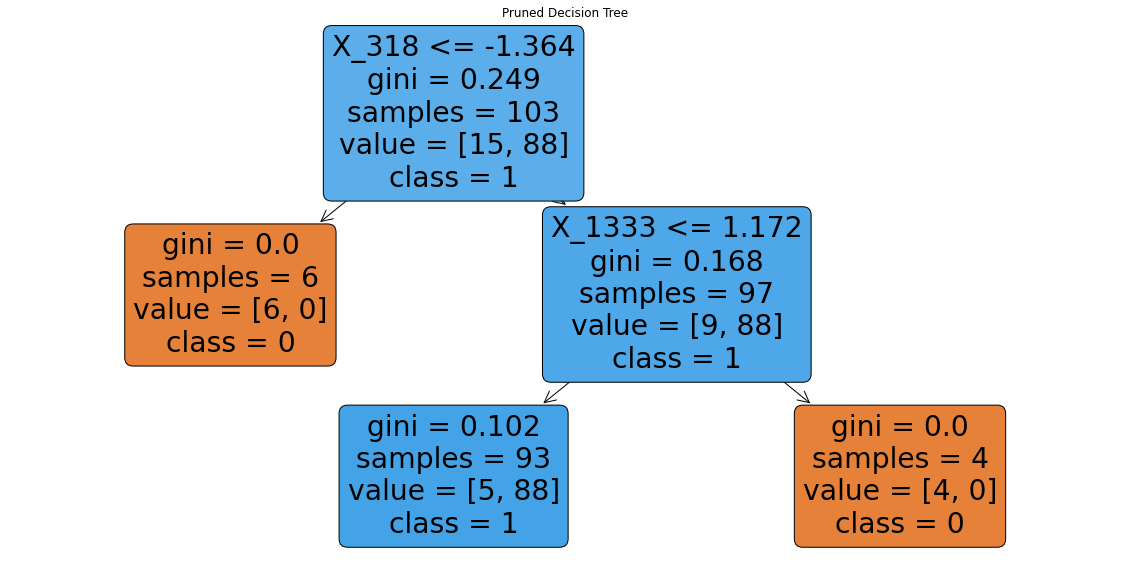

In [56]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Plot the pruned Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(pruned_decision_tree_model, filled=True, feature_names=X_train.columns, class_names=['0', '1'], rounded=True)
plt.title('Pruned Decision Tree')
plt.show()

## [추가] decision tree와 logistic regression에 대해 regularization

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize regularized models
# For Logistic Regression, C is the inverse of regularization strength (smaller values specify stronger regularization)
# For Decision Tree, ccp_alpha is the complexity parameter used for Minimal Cost-Complexity Pruning
regularized_logistic_model = LogisticRegression(C=0.1, random_state=42)
regularized_decision_tree_model = DecisionTreeClassifier(ccp_alpha=0.01, random_state=42)

# Dictionary to store the regularized models and their names
regularized_models = {
    'Regularized Logistic Regression': regularized_logistic_model,
    'Regularized Decision Tree': regularized_decision_tree_model
}

# Dictionary to store the class-wise performance metrics for regularized models
regularized_class_wise_metrics = {}

# Train each regularized model and evaluate their class-wise performance
for model_name, model in regularized_models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred_regularized = model.predict(X_test)
    
    # Generate class-wise performance metrics
    class_report_regularized = classification_report(y_test, y_pred_regularized, target_names=['Class 0', 'Class 1'], output_dict=True)
    
    # Store the class-wise performance metrics
    regularized_class_wise_metrics[model_name] = class_report_regularized

# Convert the class-wise metrics to DataFrame for the regularized models
regularized_class_wise_df_list = []
for model_name, metrics in regularized_class_wise_metrics.items():
    for class_label, class_metrics in metrics.items():
        if class_label in ['Class 0', 'Class 1']:  # Only consider the individual classes
            class_metrics['Model'] = model_name
            class_metrics['Class'] = class_label
            regularized_class_wise_df_list.append(class_metrics)

# Create a DataFrame
regularized_class_wise_df = pd.DataFrame(regularized_class_wise_df_list)

# Reorder the columns
regularized_class_wise_df = regularized_class_wise_df[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

regularized_class_wise_df

,Model,Class,precision,recall,f1-score,support
0,Regularized Logistic Regression,Class 0,0.500000,0.250000,0.333333,4
1,Regularized Logistic Regression,Class 1,0.875000,0.954545,0.913043,22
2,Regularized Decision Tree,Class 0,0.500000,0.500000,0.500000,4
3,Regularized Decision Tree,Class 1,0.909091,0.909091,0.909091,22


In [61]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Initialize a list to store confusion matrices for each regularized model
confusion_matrices = []

# Calculate the confusion matrix for each regularized model
for model_name, model in regularized_models.items():
    y_pred_regularized = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_regularized)
    
    # Store the confusion matrix along with the model name
    confusion_matrices.append((model_name, cm))

# Plot the confusion matrices
fig, axs = plt.subplots(1, len(confusion_matrices), figsize=(15, 5))

for i, (model_name, cm) in enumerate(confusion_matrices):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axs[i])
    axs[i].set_title(f'Confusion Matrix: {model_name}')
    axs[i].set_xlabel('Predicted Label')
    axs[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

ModuleNotFoundError: No module named 'seaborn'

## [추가] 각 class별로 recall값을 계산하기

In [62]:
# Initialize a dictionary to store recall values for each class and model
recall_values = {
    'Model': [],
    'Class 0 Recall': [],
    'Class 1 Recall': []
}

# Calculate the recall values for each class for the regularized models
for model_name, model in regularized_models.items():
    y_pred_regularized = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred_regularized)
    
    # Recall for Class 0 = TP / (TP + FN)
    recall_class_0 = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    
    # Recall for Class 1 = TP / (TP + FN)
    recall_class_1 = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
    # Store the recall values
    recall_values['Model'].append(model_name)
    recall_values['Class 0 Recall'].append(recall_class_0)
    recall_values['Class 1 Recall'].append(recall_class_1)

# Create a DataFrame for easy viewing
recall_df = pd.DataFrame(recall_values)

recall_df

,Model,Class 0 Recall,Class 1 Recall
0,Regularized Logistic Regression,0.25,0.954545
1,Regularized Decision Tree,0.50,0.909091


## [추가] lasso

In [63]:
# Initialize the Lasso-regularized Logistic Regression model
# Setting the penalty to 'l1' applies Lasso regularization
lasso_logistic_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Train the Lasso-regularized Logistic Regression model
lasso_logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_logistic_model.predict(X_test)

# Generate class-wise performance metrics for the Lasso-regularized Logistic Regression model
class_report_lasso = classification_report(y_test, y_pred_lasso, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the class-wise metrics to DataFrame for the Lasso-regularized Logistic Regression model
class_report_lasso_df_list = []
for class_label, class_metrics in class_report_lasso.items():
    if class_label in ['Class 0', 'Class 1']:  # Only consider the individual classes
        class_metrics['Model'] = 'Lasso Logistic Regression'
        class_metrics['Class'] = class_label
        class_report_lasso_df_list.append(class_metrics)

# Create a DataFrame
class_report_lasso_df = pd.DataFrame(class_report_lasso_df_list)

# Reorder the columns
class_report_lasso_df = class_report_lasso_df[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

class_report_lasso_df

,Model,Class,precision,recall,f1-score,support
0,Lasso Logistic Regression,Class 0,0.500,0.250000,0.333333,4
1,Lasso Logistic Regression,Class 1,0.875,0.954545,0.913043,22


## [추가] weight adjust

In [64]:
# Initialize the Logistic Regression model with class_weight set to 'balanced'
# This helps to adjust weights inversely proportional to class frequencies
weighted_logistic_model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the weighted Logistic Regression model
weighted_logistic_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_weighted = weighted_logistic_model.predict(X_test)

# Generate class-wise performance metrics for the weighted Logistic Regression model
class_report_weighted = classification_report(y_test, y_pred_weighted, target_names=['Class 0', 'Class 1'], output_dict=True)

# Convert the class-wise metrics to DataFrame for the weighted Logistic Regression model
class_report_weighted_df_list = []
for class_label, class_metrics in class_report_weighted.items():
    if class_label in ['Class 0', 'Class 1']:  # Only consider the individual classes
        class_metrics['Model'] = 'Weighted Logistic Regression'
        class_metrics['Class'] = class_label
        class_report_weighted_df_list.append(class_metrics)

# Create a DataFrame
class_report_weighted_df = pd.DataFrame(class_report_weighted_df_list)

# Reorder the columns
class_report_weighted_df = class_report_weighted_df[['Model', 'Class', 'precision', 'recall', 'f1-score', 'support']]

class_report_weighted_df

,Model,Class,precision,recall,f1-score,support
0,Weighted Logistic Regression,Class 0,0.666667,0.500000,0.571429,4
1,Weighted Logistic Regression,Class 1,0.913043,0.954545,0.933333,22
